## Clientes de tarjetas de crédito

### Problema
>Un gerente comercial de una cartera de tarjetas de crédito de consumo se enfrenta al problema del desgaste de clientes. Quieren analizar los datos para descubrir la razón detrás de esto y aprovechar lo mismo para predecir los clientes que probablemente abandonen.

>|COLUMNA|DESCRIPCIÓN|
 | ---      | ---      |
|CLIENTNUM| un número único de identificación del cliente.|
|Attrition_Flag| indica si el cliente ha cancelado su cuenta (Attrited Customer) o si todavía es un cliente activo (Existing Customer).|
|Customer_Age| la edad del cliente en años.|
|Gender| el género del cliente (Masculino o Femenino).|
|Dependent_count| el número de dependientes del cliente (por ejemplo, hijos o personas mayores a su cargo).|
|Education_Level| el nivel educativo del cliente (por ejemplo, graduado, postgraduado, etc.).|
|Marital_Status| el estado civil del cliente (soltero, casado, divorciado, etc.).|
|Income_Category| la categoría de ingresos del cliente (por ejemplo, $40K - $60K, $60K - $80K, etc.).|
|Card_Category| la categoría de tarjeta de crédito del cliente (Blue, Silver, Gold, Platinum).|
|Months_on_book| el número de meses que el cliente ha estado registrado en el banco.|
|Total_Relationship_Count| el número total de productos financieros que el cliente tiene con el banco.|
|Months_Inactive_12_mon| el número de meses en los que el cliente no ha utilizado ninguno de los productos financieros del banco en los últimos 12 meses.|
|Contacts_Count_12_mon| el número de veces que el cliente ha sido contactado por el banco en los últimos 12 meses.|
|Credit_Limit| el límite de crédito del cliente.|
|Total_Revolving_Bal| el saldo de crédito rotativo total del cliente.|
|Avg_Open_To_Buy| la cantidad promedio de crédito disponible en las cuentas del cliente.|
|Total_Amt_Chng_Q4_Q1| cambio porcentual en la cantidad de transacciones realizadas en el último trimestre (Q4) con respecto al mismo trimestre del |año anterior (Q1).|
|Total_Trans_Amt| el monto total de las transacciones realizadas por el cliente.|
|Total_Trans_Ct| el número total de transacciones realizadas por el cliente.|
|Total_Ct_Chng_Q4_Q1| cambio porcentual en el número de transacciones realizadas en el último trimestre (Q4) con respecto al mismo trimestre del año |anterior (Q1).|
|Avg_Utilization_Ratio| relación porcentual entre el saldo de crédito rotativo total y el límite de crédito del cliente.|

In [1]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


In [ ]:
# Cargar los datos
datos = pd.read_csv("./Data/BankChurners.csv", sep= ";")

### Análisis

In [3]:
# Exploración y análisis de los datos
pd.options.display.max_columns = None
datos.sample(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6597,715393908,Existing Customer,57,F,2,Post-Graduate,Married,Less than $40K,Blue,36,3,0,1,2712.0,1445,1267.0,0.819,4520,79,0.881,0.533
8229,712253058,Existing Customer,48,F,3,High School,Married,Less than $40K,Blue,40,1,2,1,2097.0,1255,842.0,0.610,4189,83,0.976,0.598
7714,718629858,Existing Customer,42,F,2,Uneducated,Married,Unknown,Blue,32,5,5,3,4708.0,0,4708.0,0.718,4597,89,0.679,0.000
6135,709982658,Existing Customer,41,F,2,College,Married,Less than $40K,Blue,31,4,2,3,9759.0,2038,7721.0,0.622,4226,77,0.638,0.209
8771,711325308,Attrited Customer,46,M,3,Unknown,Single,$80K - $120K,Blue,34,4,3,3,9959.0,0,9959.0,1.049,4859,64,0.524,0.000


In [4]:
### Revertimos el maximo de columnas visibles
pd.reset_option('display.max_columns')

In [5]:
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
datos.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


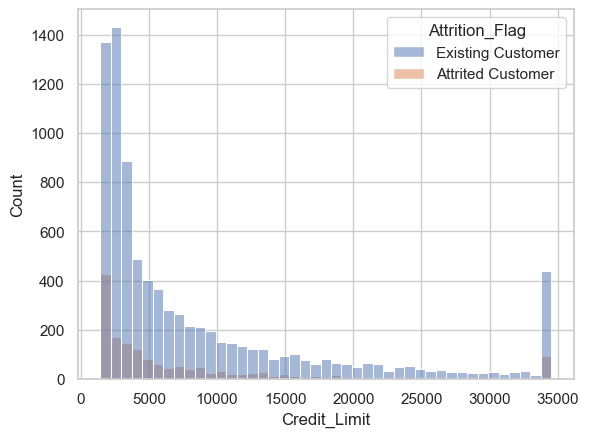

In [7]:
# Histograma de las variables numéricas
sns.set(style='whitegrid', context='notebook')
sns.histplot(data=datos, x="Credit_Limit", hue="Attrition_Flag")
plt.show()


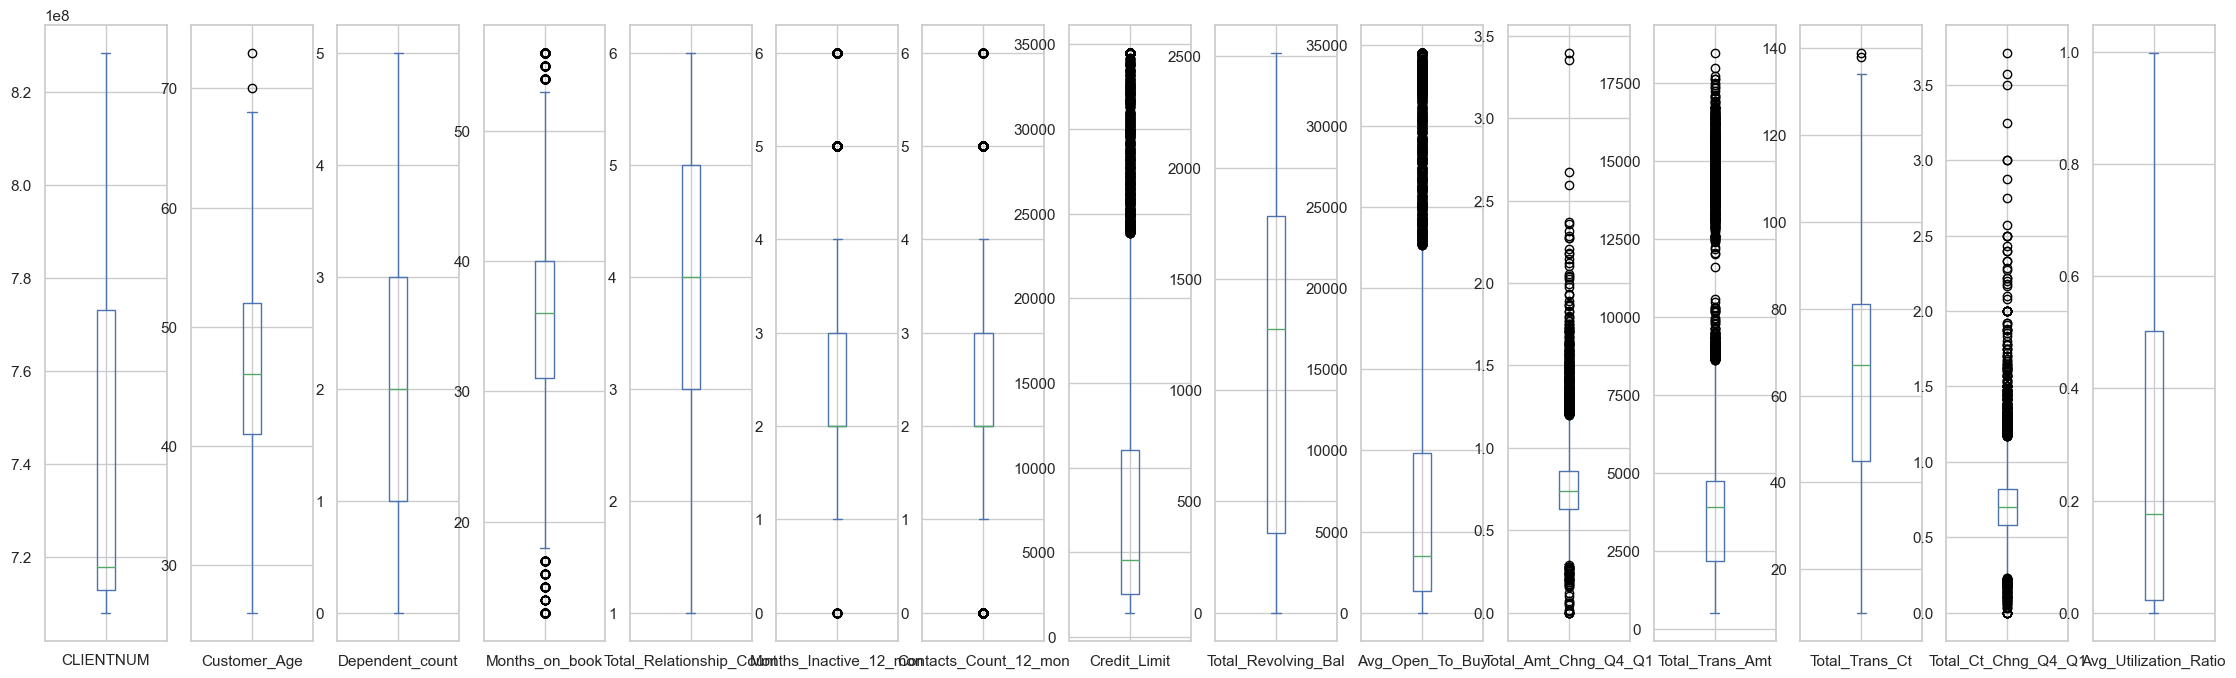

In [8]:
# Gráfico de cajas de las variables numéricas
datos.plot(kind='box', subplots=True,figsize=(28,8), sharex=False, sharey=False)
plt.show()

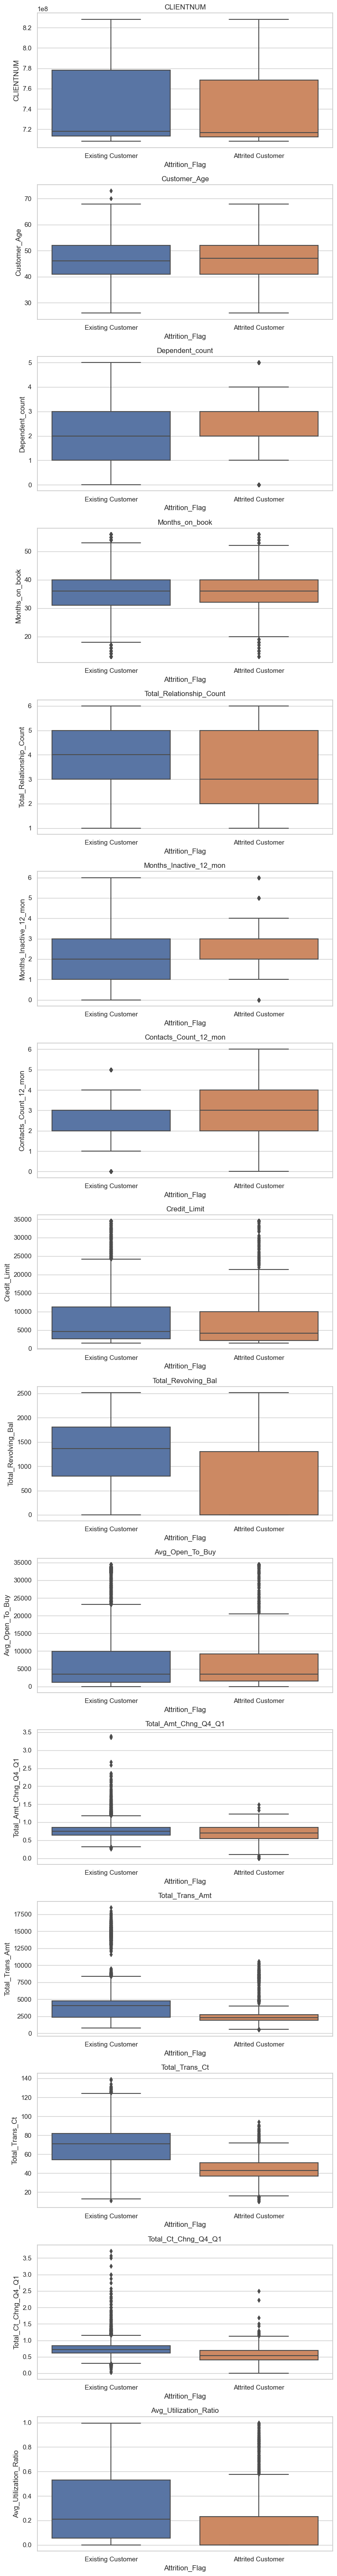

In [9]:
# Separar las variables categóricas y numéricas
cat_vars = [col for col in datos.columns if datos[col].dtype == 'object' and col != 'Attrition_Flag']
num_vars = [col for col in datos.columns if datos[col].dtype != 'object']

# Crear la figura con subplots
fig, axs = plt.subplots(len(num_vars), 1, figsize=(8, 4*len(num_vars)))
axs = axs.flatten()

# Crear los gráficos de caja para las variables numéricas y barras para las categóricas
for i, col in enumerate(num_vars):
    sns.boxplot(x="Attrition_Flag", y=col, data=datos, ax=axs[i])
    axs[i].set_title(f"{col}")

# Ajustar los subplots y mostrar la figura
fig.tight_layout()
plt.show()

C:\Users\pedro\AppData\Local\Temp\ipykernel_24780\2537572615.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = datos.corr()


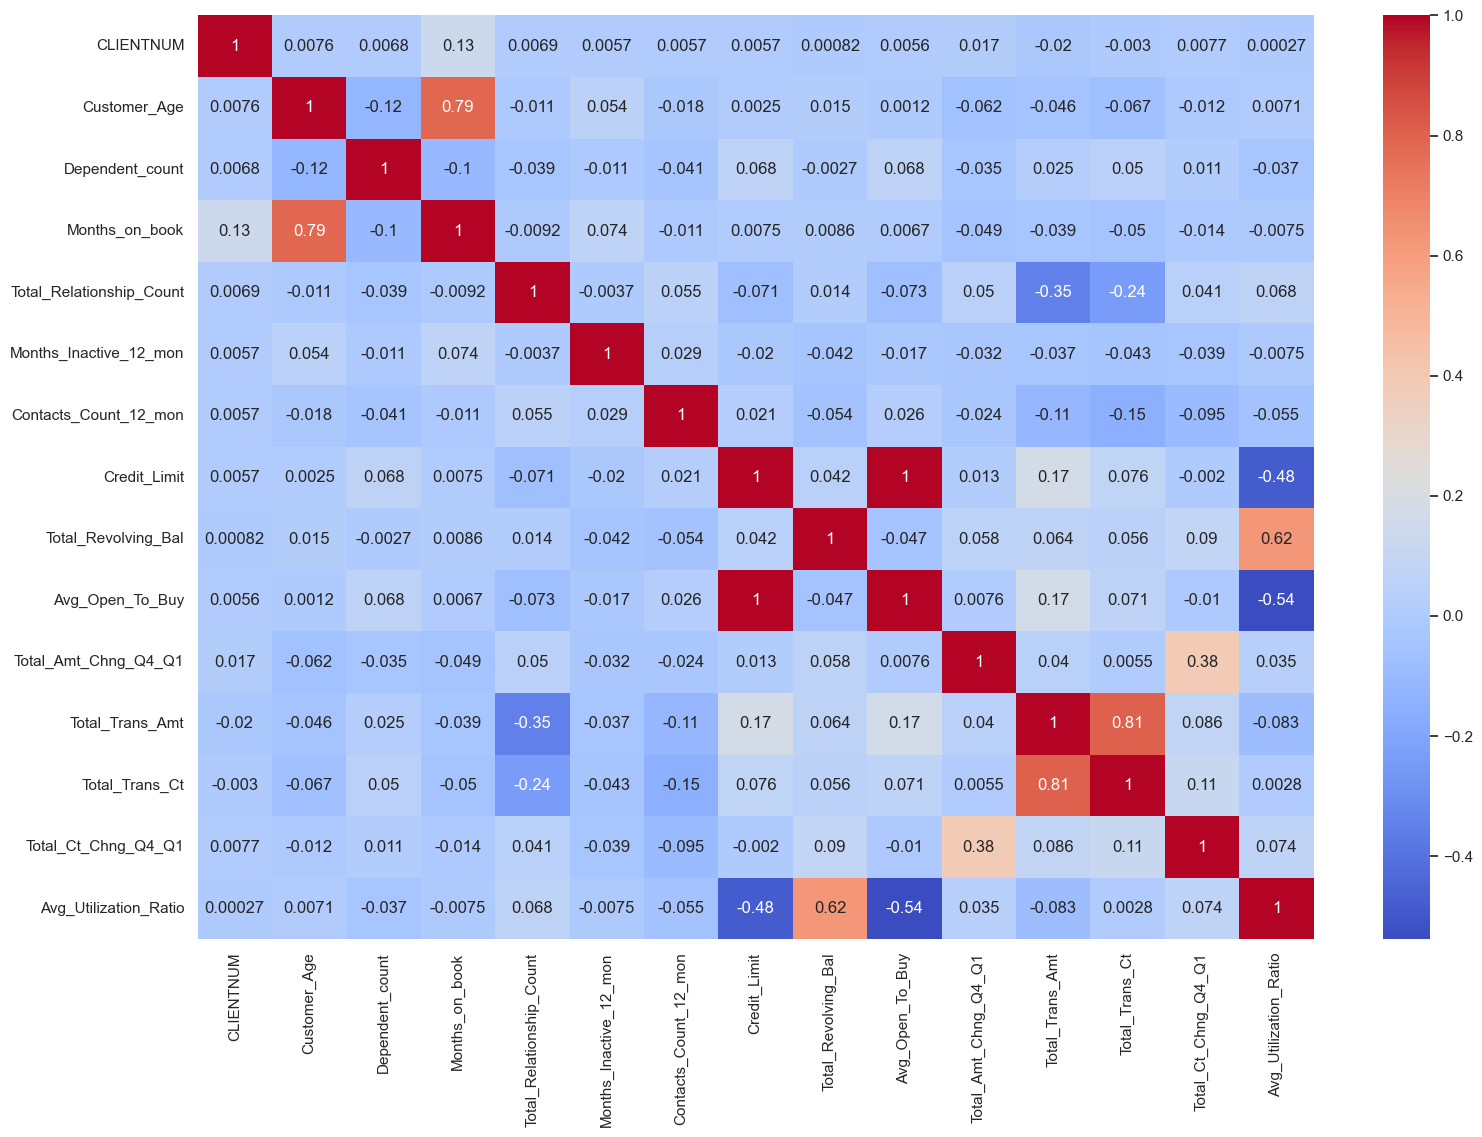

In [10]:
# Matriz de correlación
fig, axs = plt.subplots(figsize=(18, 12))
correlacion = datos.corr()
sns.heatmap(correlacion, annot=True, cmap="coolwarm",ax=axs)
plt.show()

In [11]:
# Verificar si hay valores faltantes
print(datos.isnull().sum())

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


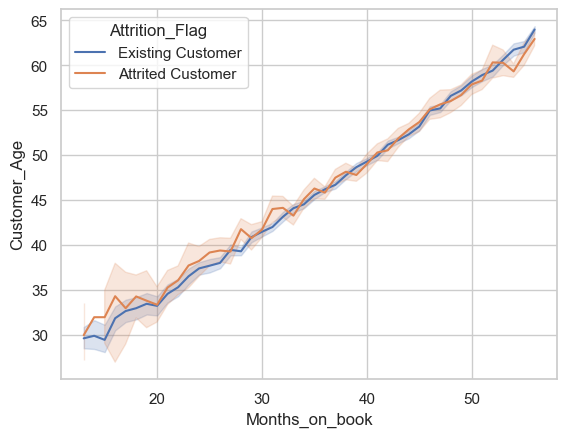

In [12]:
# Gráfico de series de tiempo de la variable "Customer_Age"
sns.lineplot(x="Months_on_book", y="Customer_Age", data=datos, hue= "Attrition_Flag")
plt.show()


<AxesSubplot: xlabel='Attrition_Flag', ylabel='count'>

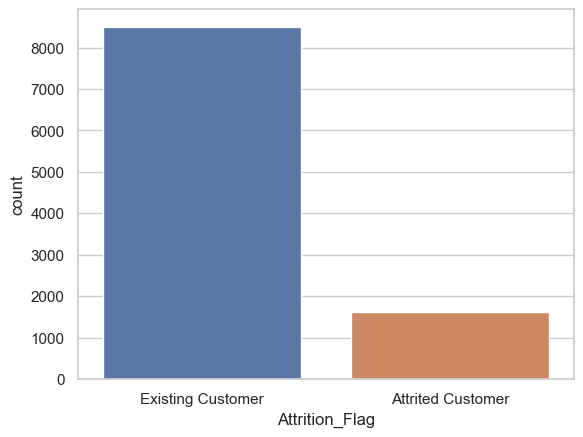

In [13]:
# Visualizar la distribución de la variable objetivo
sns.countplot(x="Attrition_Flag", data=datos)

In [14]:
# Contar los valores únicos de cada columna categórica
for col in cat_vars:
    unique_vals = datos[col].value_counts()
    print(f'{col}: {len(unique_vals)} valores diferentes')

Gender: 2 valores diferentes
Education_Level: 7 valores diferentes
Marital_Status: 4 valores diferentes
Income_Category: 6 valores diferentes
Card_Category: 4 valores diferentes


### Preprocesamiento de variables

In [15]:
# Convertir la variable objetivo en numérica
y = datos["Attrition_Flag"].apply(lambda x: 1 if x=="Attrited Customer" else 0)

In [16]:
# Eliminar las columnas innecesarias X
# Crear instancia de OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first')

#Lista de columnas a usar
_col = cat_vars

# Ajustar y transformar los datos
onehot_encoder_fit = onehot_encoder.fit_transform(datos.loc[:, _col]).toarray()

# Crear un nuevo DataFrame con los datos codificados
x_onehot_encoder = pd.DataFrame(onehot_encoder_fit
                                    , columns=onehot_encoder.get_feature_names_out(input_features= _col)
                                )
#x_onehot_encoder


x = datos[datos.columns[~datos.columns.isin(cat_vars)]].drop(["CLIENTNUM", "Attrition_Flag"], axis=1)
x = pd.concat([x, x_onehot_encoder], axis = 1)

### Tecnicas de submuestreo

+ ADASYN

In [23]:
# Aplicar sobremuestreo con ADASYN
adasyn = ADASYN(random_state=111
                , sampling_strategy=.3
                , n_neighbors= 20

             )
X_adasyn, y_adasyn = adasyn.fit_resample(x, y)

<AxesSubplot: xlabel='Attrition_Flag', ylabel='count'>

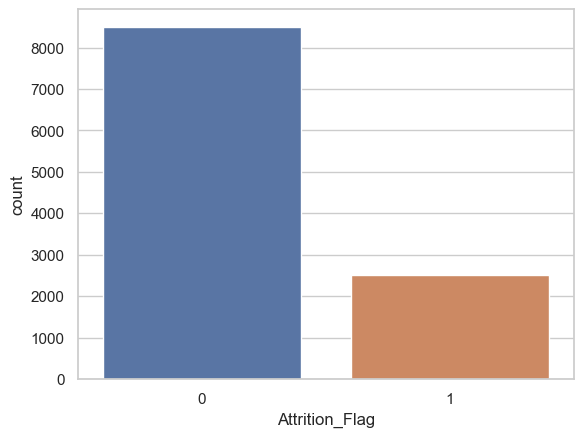

In [24]:
# Verificar si la distribución de la variable objetivo ha cambiado después de aplicar ADASYN
sns.countplot(x=y_adasyn)

In [50]:
pd.concat([X_adasyn, y_adasyn]).to_csv('adasyn.csv')